In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import ppscore as pps
from sklearn.preprocessing import StandardScaler

# import webscrape package
from cryptory import Cryptory

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 400

In [24]:
# Bring in data
path = '../thecap/Data/final.csv'
df = pd.read_csv(path, index_col='Date', parse_dates=True)
df.drop(columns=['Target','Target_1d'],inplace=True)
df.head()

,Close,vol%_chg1d,vol%_chg3d,vol%_chg8d,range,range%,JPY%,Close_JPY,btc_tweets,btc_activeaddresses,btc_mining_profitability,btc_transactionfees,btc_median_transaction_fee,btc_mediantransactionvalue,sub_growth_%chg,btc_gtrends,buybitcoin_gtrends,ETH_gtrends,crypto_gtrends
Date,,,,,,,,,,,,,,,,,,,
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64989,847972,2.281,25.170,15.291,2182.0,0.007039,48.214286,0.0,1.295976,6.291338
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62044,842391,2.174,26.274,14.625,2104.0,0.007324,46.428571,0.0,1.295976,6.291338
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000923,112.769997,77723,982159,2.431,26.522,12.574,3921.0,0.007731,53.571429,0.0,1.295976,10.485563
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.004664,112.244003,79086,953442,2.737,28.461,15.529,4847.0,0.008254,55.357143,0.0,2.591952,10.485563
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.003234,112.607002,74534,1071574,2.606,27.264,15.519,5033.0,0.008228,53.571429,0.0,2.591952,14.679788


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1070 entries, 2017-12-31 to 2020-12-03
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Close                       1062 non-null   float64
 1   vol%_chg1d                  1062 non-null   float64
 2   vol%_chg3d                  1062 non-null   float64
 3   vol%_chg8d                  1062 non-null   float64
 4   range                       1062 non-null   float64
 5   range%                      1062 non-null   float64
 6   JPY%                        1066 non-null   float64
 7   Close_JPY                   1066 non-null   float64
 8   btc_tweets                  1070 non-null   int64  
 9   btc_activeaddresses         1070 non-null   int64  
 10  btc_mining_profitability    1070 non-null   float64
 11  btc_transactionfees         1070 non-null   float64
 12  btc_median_transaction_fee  1070 non-null   float64
 13  btc_mediantrans

In [26]:
df.index.duplicated().sum()

1

In [27]:
df = df[~df.index.duplicated(keep='first')]

In [28]:
df.index.duplicated().sum()

0

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1061.0,8291.186370,2860.519583,3236.761719,6495.839844,8228.783203,9889.424805,1.962584e+04
vol%_chg1d,1061.0,0.017794,0.196644,-0.512458,-0.105889,-0.010614,0.103856,1.388981e+00
vol%_chg3d,1061.0,0.034232,0.273651,-0.567185,-0.144373,0.000277,0.153168,1.531739e+00
vol%_chg8d,1061.0,0.049349,0.321489,-0.653335,-0.163518,-0.015020,0.190431,1.846109e+00
range,1061.0,1.046562,0.043374,1.004622,1.020268,1.035003,1.057416,1.631387e+00
range%,1061.0,0.000662,0.039033,-0.227870,-0.015993,-0.001275,0.014931,5.681892e-01
JPY%,1065.0,-0.000299,0.004632,-0.021742,-0.002361,-0.000079,0.002291,2.704872e-02
Close_JPY,1065.0,108.839885,2.395297,103.112000,107.052002,108.734001,110.628998,1.144860e+02
btc_tweets,1069.0,30267.179607,17250.307107,0.000000,18611.000000,26789.000000,35977.000000,1.113940e+05
btc_activeaddresses,1069.0,643296.303087,140439.087959,330211.000000,537562.000000,624348.000000,732478.000000,1.077376e+06


In [30]:
df.dropna(inplace=True)
df.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1061 entries, 2018-01-08 to 2020-12-03
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Close                       1061 non-null   float64
 1   vol%_chg1d                  1061 non-null   float64
 2   vol%_chg3d                  1061 non-null   float64
 3   vol%_chg8d                  1061 non-null   float64
 4   range                       1061 non-null   float64
 5   range%                      1061 non-null   float64
 6   JPY%                        1061 non-null   float64
 7   Close_JPY                   1061 non-null   float64
 8   btc_tweets                  1061 non-null   int64  
 9   btc_activeaddresses         1061 non-null   int64  
 10  btc_mining_profitability    1061 non-null   float64
 11  btc_transactionfees         1061 non-null   float64
 12  btc_median_transaction_fee  1061 non-null   float64
 13  btc_mediantrans

In [31]:
dfcopy = df.copy()

# plots

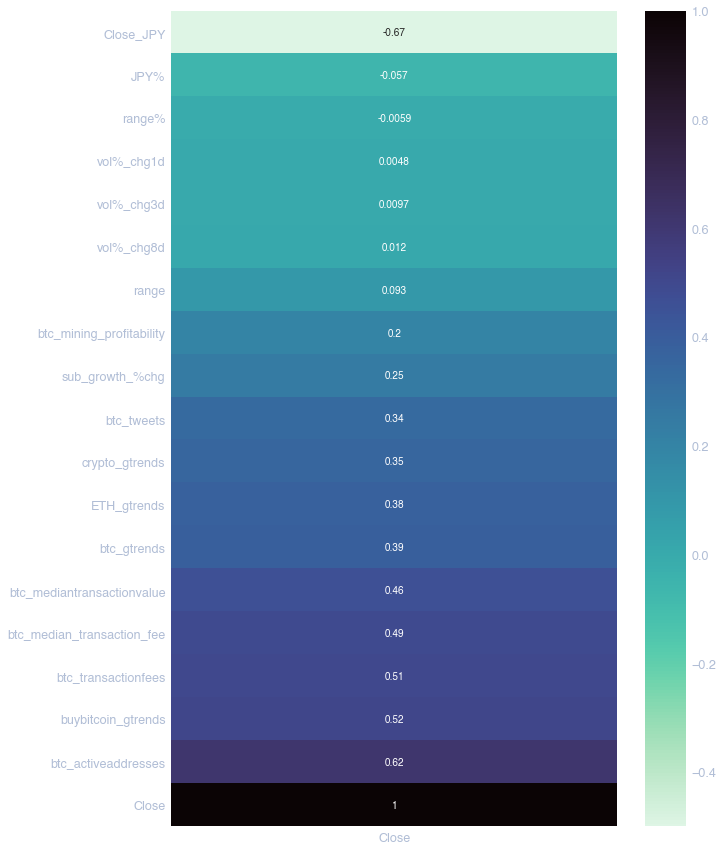

In [32]:
fig, ax = plt.subplots(figsize=(10,15))  

sns.heatmap(df.corr()[['Close']].sort_values('Close'),
            annot=True,vmin=-.5,vmax=1,cmap='mako_r',robust=True,ax=ax);

In [33]:
# Let's create a line plot

def subplot_(title, start, end, column):
    start_date = start
    end_date = end
    dfcol = column
    
    # retrieve values between two datetime indexes
    df_plot = df[(df.index > start_date ) & (df.index <= end_date )]
    # print helpful stats
    print('BTC/USD return is ' + str(df['Close'].loc[end_date]/df['Close'].loc[start_date]-1))
    print('Occured over ' + str(len(df['Close'])) + ' day period')

    # Establish figure size
    plt.figure(figsize = (15, 9))

    # plot 1
    ax1 = plt.subplot(2, 1, 1)
    ax1.set_title(f'{title}')
    ax1.plot(df_plot['Close'],color = 'navy',marker='x')
    plt.ylabel('BTC/USD',fontsize=20)
    # Rotate text
    plt.xticks(rotation = 10)
    # Enlarge tick marks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12);
    
    # plot 2
    #(2, 1, 2) means we have 2 rows, 1 column, referencing plot 1.
    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ax2.set_title(f'{dfcol}')
    ax2.plot(df_plot[f'{dfcol}'],color = 'cadetblue',marker='o')
    plt.ylabel(f'{dfcol}',fontsize=20)
    # Rotate text
    plt.xticks(rotation = 10)
    # Enlarge tick marks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12);
    plt.tight_layout(); # adds more space

In [34]:
df.columns

Index(['Close', 'vol%_chg1d', 'vol%_chg3d', 'vol%_chg8d', 'range', 'range%',
       'JPY%', 'Close_JPY', 'btc_tweets', 'btc_activeaddresses',
       'btc_mining_profitability', 'btc_transactionfees',
       'btc_median_transaction_fee', 'btc_mediantransactionvalue',
       'sub_growth_%chg', 'btc_gtrends', 'buybitcoin_gtrends', 'ETH_gtrends',
       'crypto_gtrends'],
      dtype='object')

In [35]:
cols = list(df.columns)

for col in cols:
    df[f'{col}'] = df[f'{col}'].map(np.log)

/Users/j_b/opt/anaconda3/lib/python3.8/site-packages/pandas/core/base.py:1145: RuntimeWarning: invalid value encountered in log
  new_values = map_f(values, mapper)
/Users/j_b/opt/anaconda3/lib/python3.8/site-packages/pandas/core/base.py:1145: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


In [36]:
df.replace([np.inf, -np.inf], 0, inplace=True)
df.replace(np.nan, 0, inplace=True)
df.head()

,Close,vol%_chg1d,vol%_chg3d,vol%_chg8d,range,range%,JPY%,Close_JPY,btc_tweets,btc_activeaddresses,btc_mining_profitability,btc_transactionfees,btc_median_transaction_fee,btc_mediantransactionvalue,sub_growth_%chg,btc_gtrends,buybitcoin_gtrends,ETH_gtrends,crypto_gtrends
Date,,,,,,,,,,,,,,,,,,,
2018-01-08,9.627082,-1.828909,0.000000,-0.659213,0.151835,-2.730479,-5.717013,4.728750,10.328265,13.838227,1.013054,3.437497,2.872660,8.226573,-4.589627,3.912023,0.0,0.952411,2.532321
2018-01-09,9.588462,0.000000,0.000000,-0.479878,0.071785,0.000000,0.000000,4.728635,11.301365,13.800565,0.975691,3.447667,2.891815,8.326275,-4.666652,3.875655,0.0,0.952411,2.532321
2018-01-10,9.614024,-2.202810,-1.795371,-2.320831,0.089515,-4.023616,0.000000,4.725217,11.318819,13.804878,0.886656,3.391955,2.800265,8.298042,-4.717835,3.912023,0.0,0.952411,2.532321
2018-01-11,9.503443,0.000000,0.000000,0.000000,0.136240,-3.040025,0.000000,4.713522,11.516250,13.890039,0.937661,3.354315,2.768330,8.087025,-4.765773,4.045554,0.0,0.952411,2.532321
2018-01-12,9.545426,0.000000,0.000000,0.000000,0.078308,0.000000,0.000000,4.712175,11.298952,13.799820,0.796155,3.358673,2.767765,8.078688,-4.970764,3.837915,0.0,0.952411,2.349999


BTC/USD return is 0.024476865486178
Occured over 1061 day period


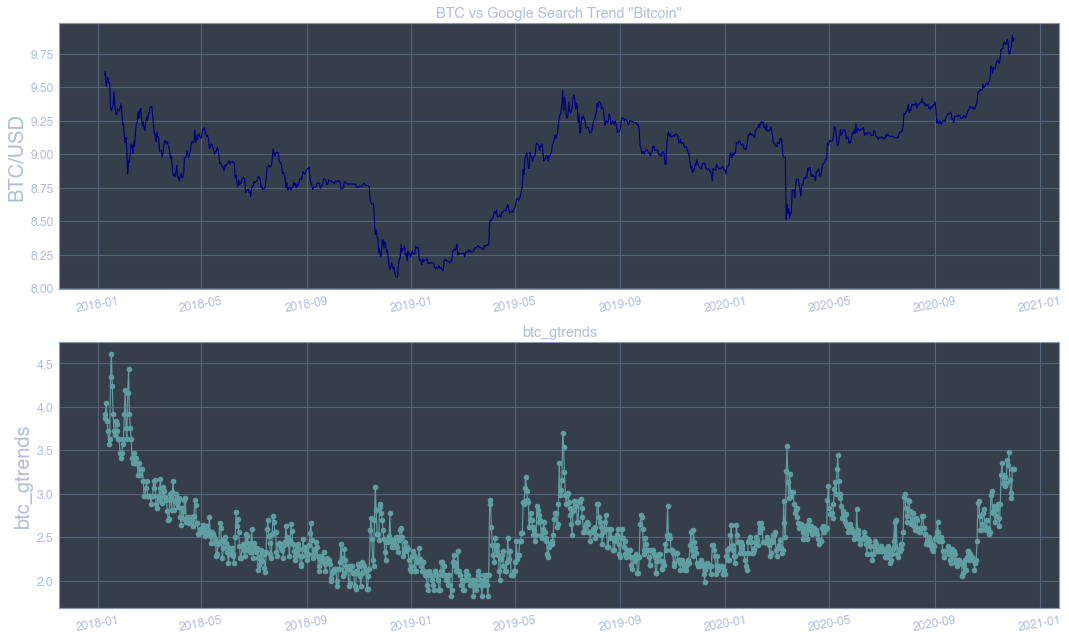

In [37]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC vs Google Search Trend "Bitcoin"'
column = 'btc_gtrends'

subplot_(title, start, end, column)

BTC/USD return is 0.024476865486178
Occured over 1061 day period


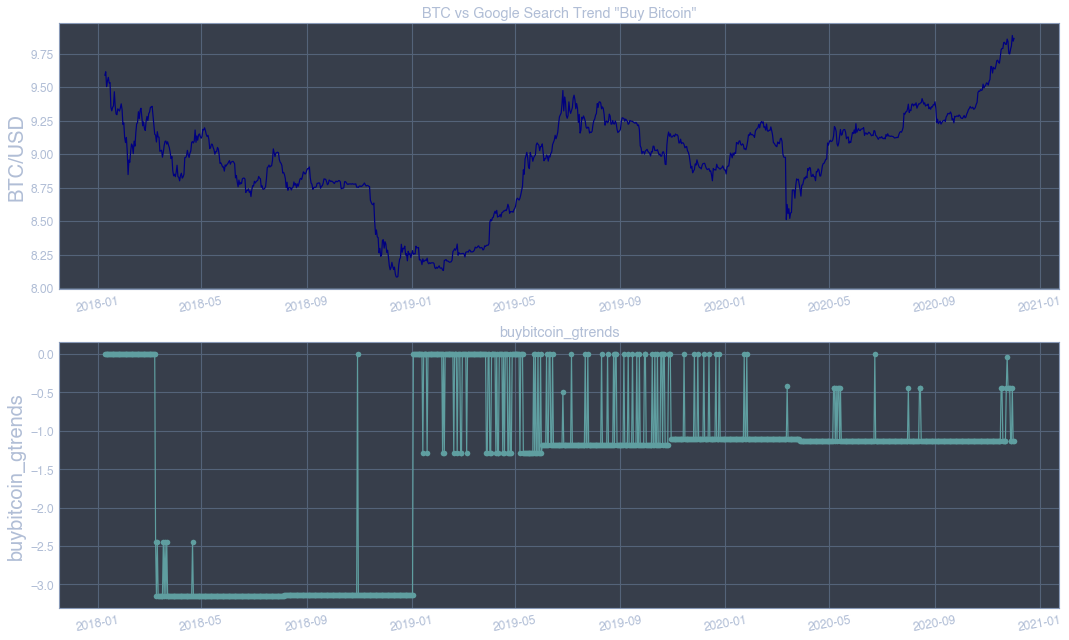

In [38]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC vs Google Search Trend "Buy Bitcoin"'
column = 'buybitcoin_gtrends'

subplot_(title, start, end, column)

BTC/USD return is 0.024476865486178
Occured over 1061 day period


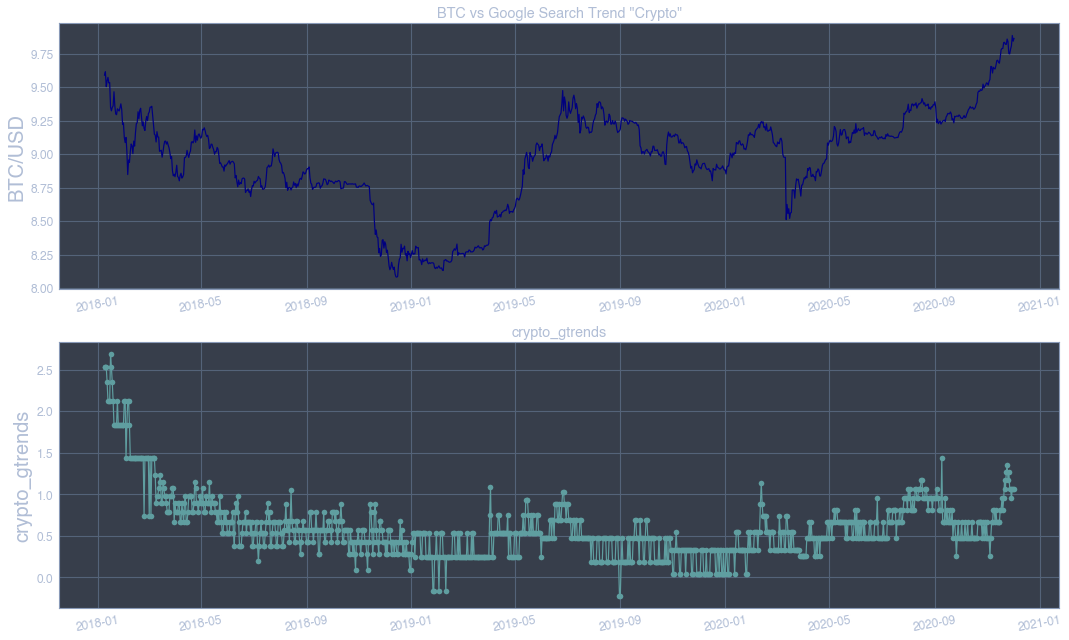

In [39]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC vs Google Search Trend "Crypto"'
column = 'crypto_gtrends'

subplot_(title, start, end, column)

BTC/USD return is 0.024476865486178
Occured over 1061 day period


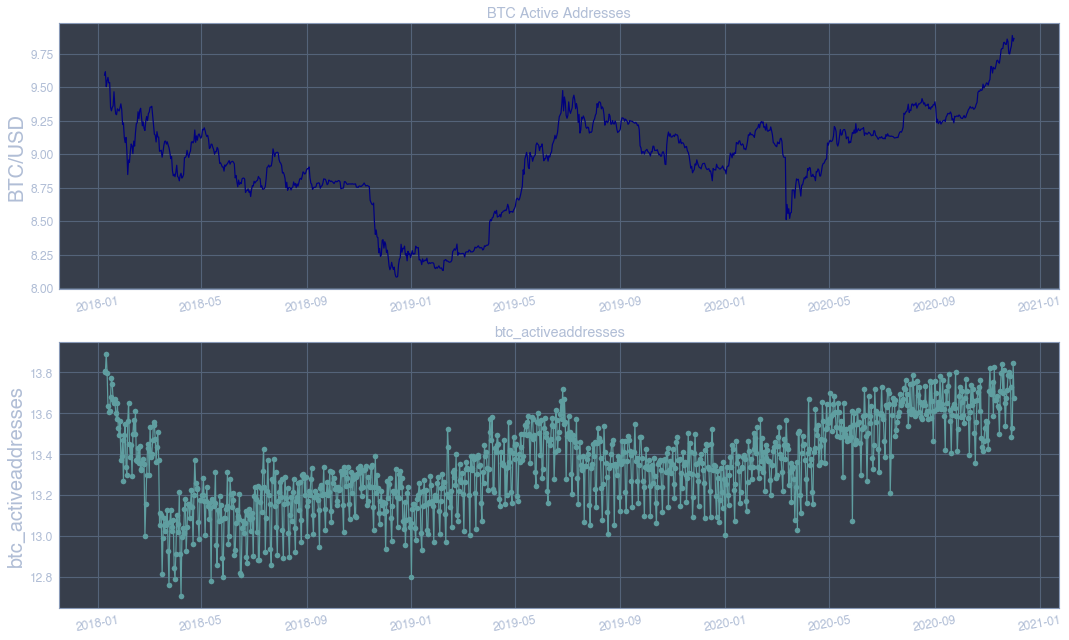

In [40]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC Active Addresses'
column = 'btc_activeaddresses'

subplot_(title, start, end, column)

BTC/USD return is 0.024476865486178
Occured over 1061 day period


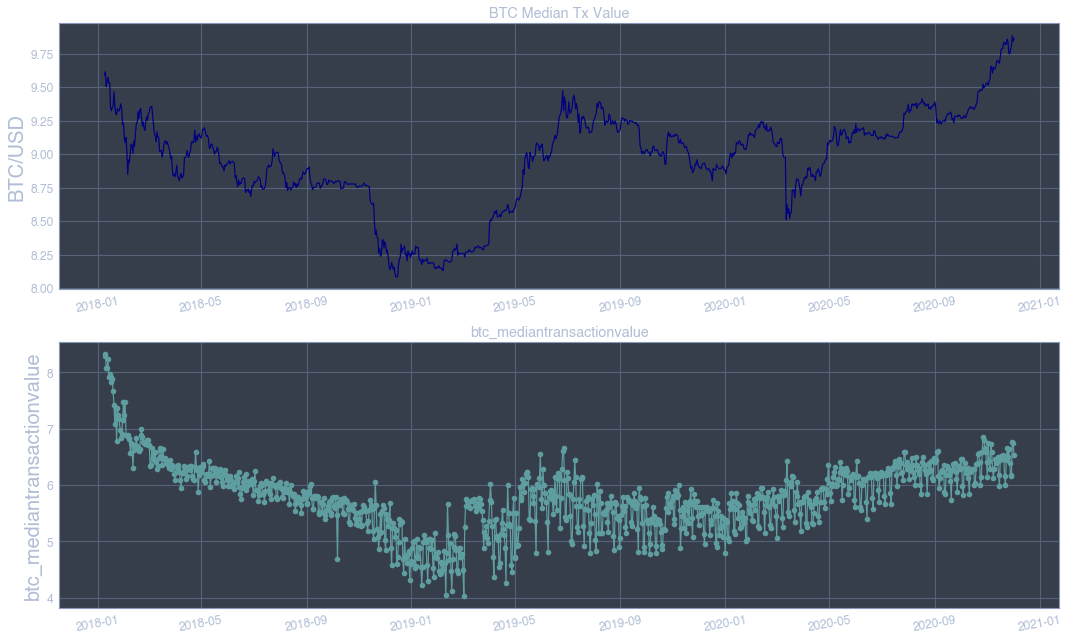

In [41]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC Median Tx Value'
column = 'btc_mediantransactionvalue'

subplot_(title, start, end, column)

BTC/USD return is 0.024476865486178
Occured over 1061 day period


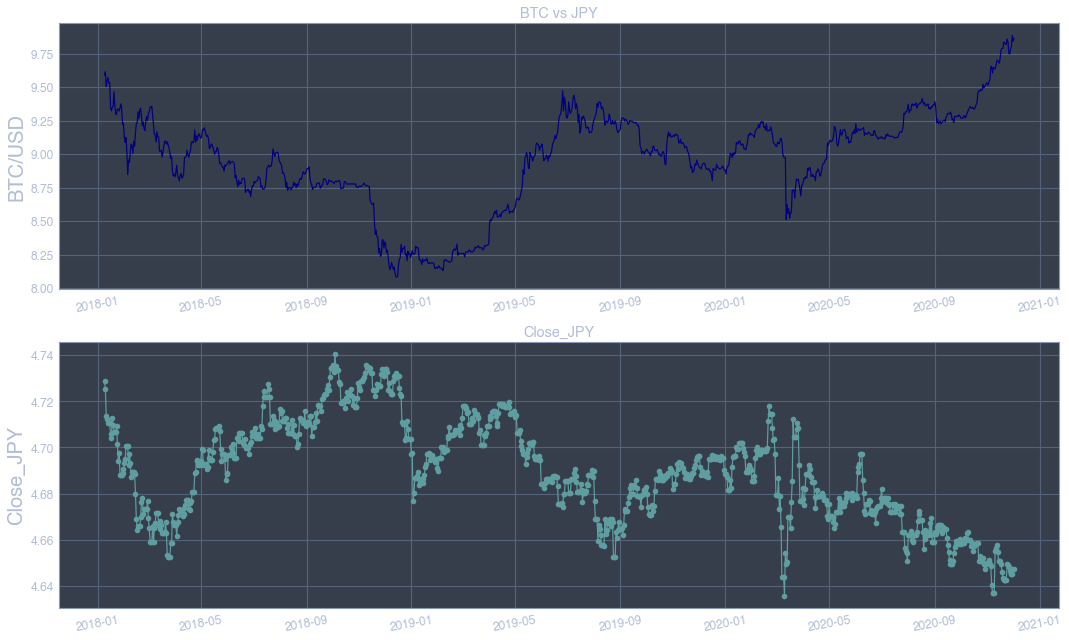

In [42]:
start = '2018-01-08'
end = '2020-12-02'
title = 'BTC vs JPY'
column = 'Close_JPY'

subplot_(title, start, end, column)

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()